In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [21]:
import pandas as pd
data = pd.read_csv("../data/example/data.csv",index_col=0)
meta = pd.read_csv("../data/example/meta.csv")

assert data.shape[1] == meta.shape[0]

In [24]:
# log the data and subtract the first timepoint
data = np.log2(data)
data = data-data.iloc[0,:].values

In [25]:
import bgreat
bgreat.setGlobals(_data=data,_meta=meta)

In [26]:
parent = 'parent'
control = 'control'
condition = 'stress'
meta['strain-regression'] = (meta.strain!=parent).astype(int)
meta['condition'] = (meta.Condition!=control).astype(int)
meta['interaction'] = meta['strain-regression']*meta.condition
bgreat.setGlobals(_parent=parent,_control=control,_condition=condition)

(-0.5, 3.0)

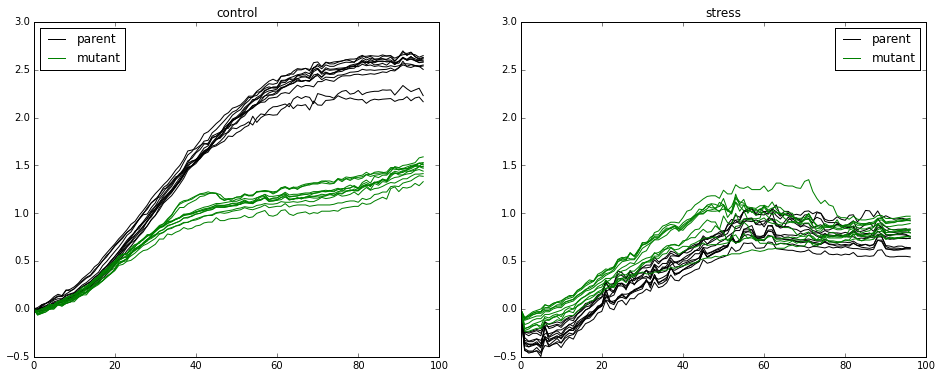

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('control')
bgreat.plotSamples(data.values[:,np.where((meta.condition==0)& (meta.strain==parent))[0]],color='k',label='parent')
bgreat.plotSamples(data.values[:,np.where((meta.condition==0)& (meta.strain!=parent))[0]],color='g',label='mutant')
plt.legend(loc='best')
plt.ylim(-.5,3.0)

plt.subplot(122)
plt.title('stress')
bgreat.plotSamples(data.values[:,np.where((meta.condition==1)& (meta.strain==parent))[0]],color='k',label='parent')
bgreat.plotSamples(data.values[:,np.where((meta.condition==1)& (meta.strain!=parent))[0]],color='g',label='mutant')
plt.legend(loc='best')
plt.ylim(-.5,3.0)

In [29]:
mutants = ['mutant']
results = bgreat.testMutantControl(mutants)

In [30]:
results

,actual,permuted,FDR
mutant,77.29565,"[4.33414061096, -0.000668139471372, -0.0004070...",0


In [31]:
mutants = ['mutant']
results = bgreat.testMutantCondition(mutants)

In [32]:
results

,actual,permuted,FDR
mutant,-2.111766e-05,"[26.8438894264, 134.47266583, -0.827841502895,...",0.9
